# BIG DATA ANALYTICS PROGRAMMING : AR model

---
References
- https://github.com/ritvikmath/Time-Series-Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta

## 데이터 로드

In [2]:
#read data
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [6]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [7]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [8]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [9]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [10]:
df_ice_cream.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='date', length=121, freq=None)

In [11]:
pd.infer_freq(df_ice_cream.index)

'MS'

In [12]:
df_ice_cream = df_ice_cream.asfreq(pd.infer_freq(df_ice_cream.index))

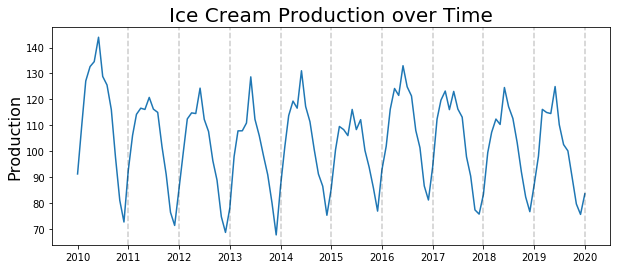

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF, PACF 계산
 - ACF와 PACF를 확인한 뒤, AR, MA 모델중 적합한 것을 결정하고 파라미터를 결정
 - ACF에 급격한 감소가 있다 = MA
 - PACF에 급격한 감소가 있다 = AR

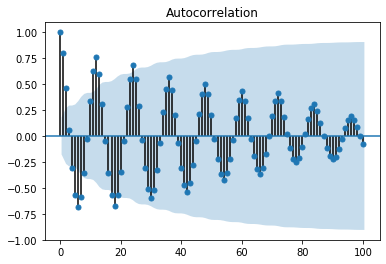

In [14]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

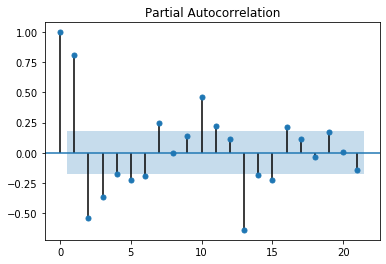

In [15]:
pacf_plot = plot_pacf(df_ice_cream.production)

In [16]:
train_end = datetime(2016,12,1)
test_end = datetime(2019,12,1)
train_data = df_ice_cream.production[:train_end]
test_data = df_ice_cream.production[train_end + timedelta(days=1):test_end]

In [17]:
model = ARMA(train_data, order=(3,0))

In [18]:
model_fit = model.fit()

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             production   No. Observations:                   84
Model:                     ARMA(3, 0)   Log Likelihood                -294.008
Method:                       css-mle   S.D. of innovations              7.903
Date:                Wed, 25 Nov 2020   AIC                            598.015
Time:                        16:40:28   BIC                            610.169
Sample:                    01-01-2010   HQIC                           602.901
                         - 12-01-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5080      2.176     47.575      0.000      99.244     107.772
ar.L1.production     1.0488      0.099     10.573      0.000       0.854       1.243
ar.L2.production    -0.0532      0.152     -0.350      0.727      -0.351       0.245
ar.L3.production    -0.3960      0.102     -3.900      0.000      -0.595      -0.197
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9527           -0.5748j            1.1127           -0.0864
AR.2            0.9527           +0.5748j            1.1127            0.0864
AR.3           -2.0397           -0.0000j            2.0397           -0.5000
-----------------------------------------------------------------------------
"""

In [20]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [21]:
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

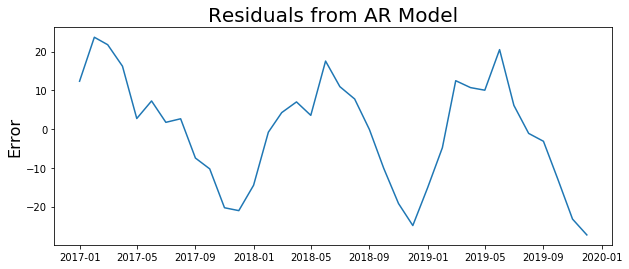

In [22]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error',fontsize=16)

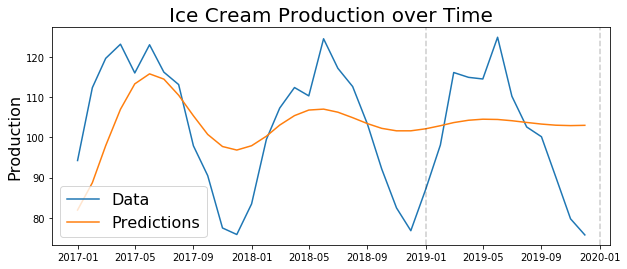

In [23]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [24]:
print('MAPE', round(np.mean(abs(residuals/test_data)),4))

MAPE 0.1211


In [25]:
print('RMSE', np.sqrt(np.mean(residuals**2)))

RMSE 13.889855279442276


## Rolling Forecast Origin
- 예측하는 지점을 일정하게 유지하면 좋지 않을까? (예: 마지막 데이터 이후로 3년)
<a href="https://www.researchgate.net/figure/Forecast-on-a-rolling-origin-cross-validation_fig1_326835034"><img style="width:400px" src="https://www.researchgate.net/profile/Alireza_Shojaei2/publication/326835034/figure/fig1/AS:669569765097494@1536649280728/Forecast-on-a-rolling-origin-cross-validation.ppm" alt="Forecast on a rolling origin cross-validation."/></a>

In [26]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = df_ice_cream.production[:end_date -timedelta(days=1)]
    print(end_date -timedelta(days=1))
    model = ARMA(train_data, order=(3,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


2016-12-31 00:00:00
2017-01-31 00:00:00
2017-02-28 00:00:00
2017-03-31 00:00:00
2017-04-30 00:00:00
2017-05-31 00:00:00
2017-06-30 00:00:00
2017-07-31 00:00:00
2017-08-31 00:00:00
2017-09-30 00:00:00
2017-10-31 00:00:00
2017-11-30 00:00:00
2017-12-31 00:00:00
2018-01-31 00:00:00
2018-02-28 00:00:00
2018-03-31 00:00:00
2018-04-30 00:00:00
2018-05-31 00:00:00
2018-06-30 00:00:00
2018-07-31 00:00:00
2018-08-31 00:00:00
2018-09-30 00:00:00
2018-10-31 00:00:00
2018-11-30 00:00:00
2018-12-31 00:00:00
2019-01-31 00:00:00
2019-02-28 00:00:00
2019-03-31 00:00:00
2019-04-30 00:00:00
2019-05-31 00:00:00
2019-06-30 00:00:00
2019-07-31 00:00:00
2019-08-31 00:00:00
2019-09-30 00:00:00
2019-10-31 00:00:00
2019-11-30 00:00:00


In [121]:
residuals_rolling = test_data - predictions_rolling

Text(0, 0.5, 'Error')

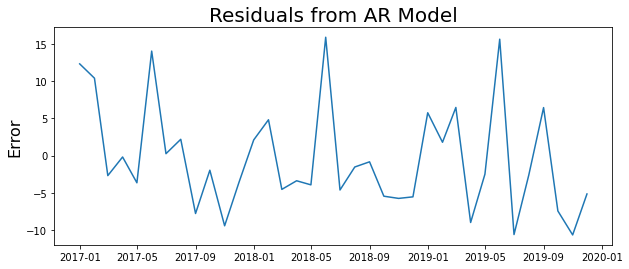

In [122]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error',fontsize=16)

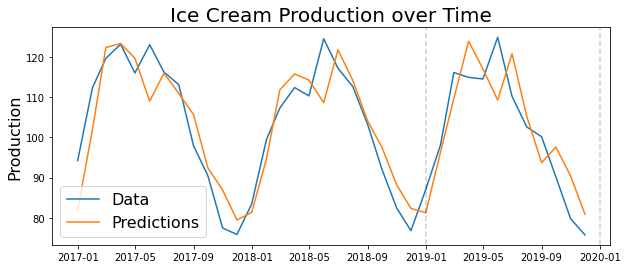

In [123]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [124]:
print('MAPE', round(np.mean(abs(residuals_rolling/test_data)),4))
print('RMSE', np.sqrt(np.mean(residuals_rolling**2)))

MAPE 0.0582
RMSE 7.1965546436148164
